In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv(r"C:\Users\DELL\Downloads\employee_train__1_.csv-1756126131509")
test = pd.read_csv(r"C:\Users\DELL\Downloads\employee_test__1_.csv-1756126132103")


In [3]:
train

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,WA,No,No,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,8/29/2014 11:22,29,f,United Kingdom,NaN,No,No,Yes,Often,...,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,8/29/2014 11:23,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1046,1047,8/29/2014 11:24,33,Malr,Italy,NaN,No,Yes,Yes,Sometimes,...,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,I suffered of panic attacks and agoraphobia fo...


In [4]:
test

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
206,207,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
207,208,11/7/2015 12:36,34,male,United States,CA,No,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
208,209,11/30/2015 21:25,46,f,United States,NC,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
test.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [6]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (1048, 28)
Test shape: (210, 27)


,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


 Understand the Problem
1️⃣ Identify Target Column

In your dataset, the target column = "treatment".

It contains "Yes" or "No".

This is what we want to predict for the test set.

👉 Convert it into numerical values (because ML models can’t use strings directly):

In [8]:
train["treatment"].value_counts()

treatment
No     536
Yes    512
Name: count, dtype: int64

Type of ML problem

Since target = 2 categories → it is a Supervised Binary Classification problem.

Supervised → because we have labeled training data (treatment is known).

Classification → because output is categorical (Yes / No).

In [9]:
# 1. Check unique values in target column
print("Unique values in target:", train["treatment"].unique())

Unique values in target: ['Yes' 'No']


In [10]:
# 2. Value counts
print("\nClass distribution (counts):")
print(train["treatment"].value_counts())

print("\nClass distribution (percentage):")
print(train["treatment"].value_counts(normalize=True) * 100)


Class distribution (counts):
treatment
No     536
Yes    512
Name: count, dtype: int64

Class distribution (percentage):
treatment
No     51.145038
Yes    48.854962
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_4936\287911881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="treatment", data=train, palette="Set2")


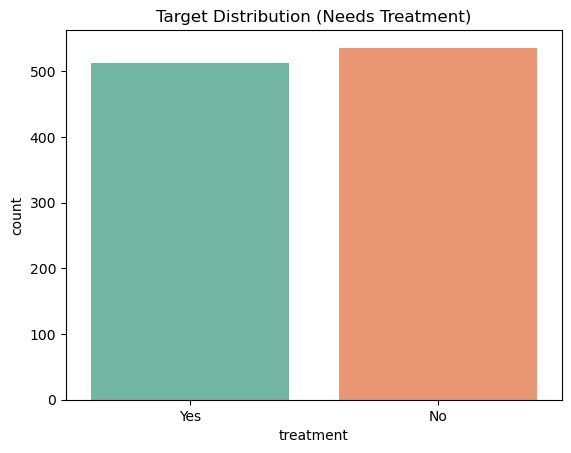

In [11]:
# 3. Visualization
sns.countplot(x="treatment", data=train, palette="Set2")
plt.title("Target Distribution (Needs Treatment)")
plt.show()

In [12]:
# 4. Encode target (Yes->1, No->0)
y = train["treatment"].map({"Yes": 1, "No": 0})

print("\nEncoded target distribution:")
print(y.value_counts())


Encoded target distribution:
treatment
0    536
1    512
Name: count, dtype: int64


### EDA (Missing values, Numeric, Categorical analysis) 

Missing Value Analysis

Missing values (%):
comments            87.404580
state               39.312977
work_interfere      22.519084
self_employed        1.717557
benefits             1.240458
leave                0.381679
wellness_program     0.381679
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_4936\3789146314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


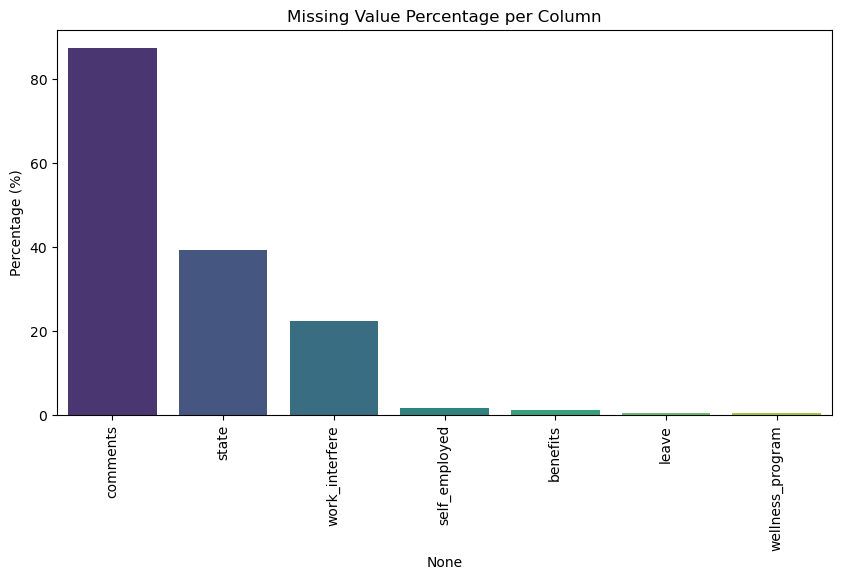

In [13]:
# Step 3b: Missing Value Analysis

missing = (train.isnull().mean() * 100).sort_values(ascending=False)
missing = missing[missing > 0]  # only show columns with missing values

print("Missing values (%):")
print(missing)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Missing Value Percentage per Column")
plt.ylabel("Percentage (%)")
plt.show()

Summary + distribution plots.

In [14]:
# Step 3c: Numeric Features

# Select numeric columns
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns:", num_cols)

# Summary statistics
print(train[num_cols].describe().T)




Numeric columns: ['S.No', 'Age']
       count          mean           std     min     25%    50%     75%  \
S.No  1048.0  5.245000e+02  3.026758e+02     1.0  262.75  524.5  786.25   
Age   1048.0  9.541988e+07  3.089010e+09 -1726.0   27.00   31.0   36.00   

               max  
S.No  1.048000e+03  
Age   1.000000e+11  


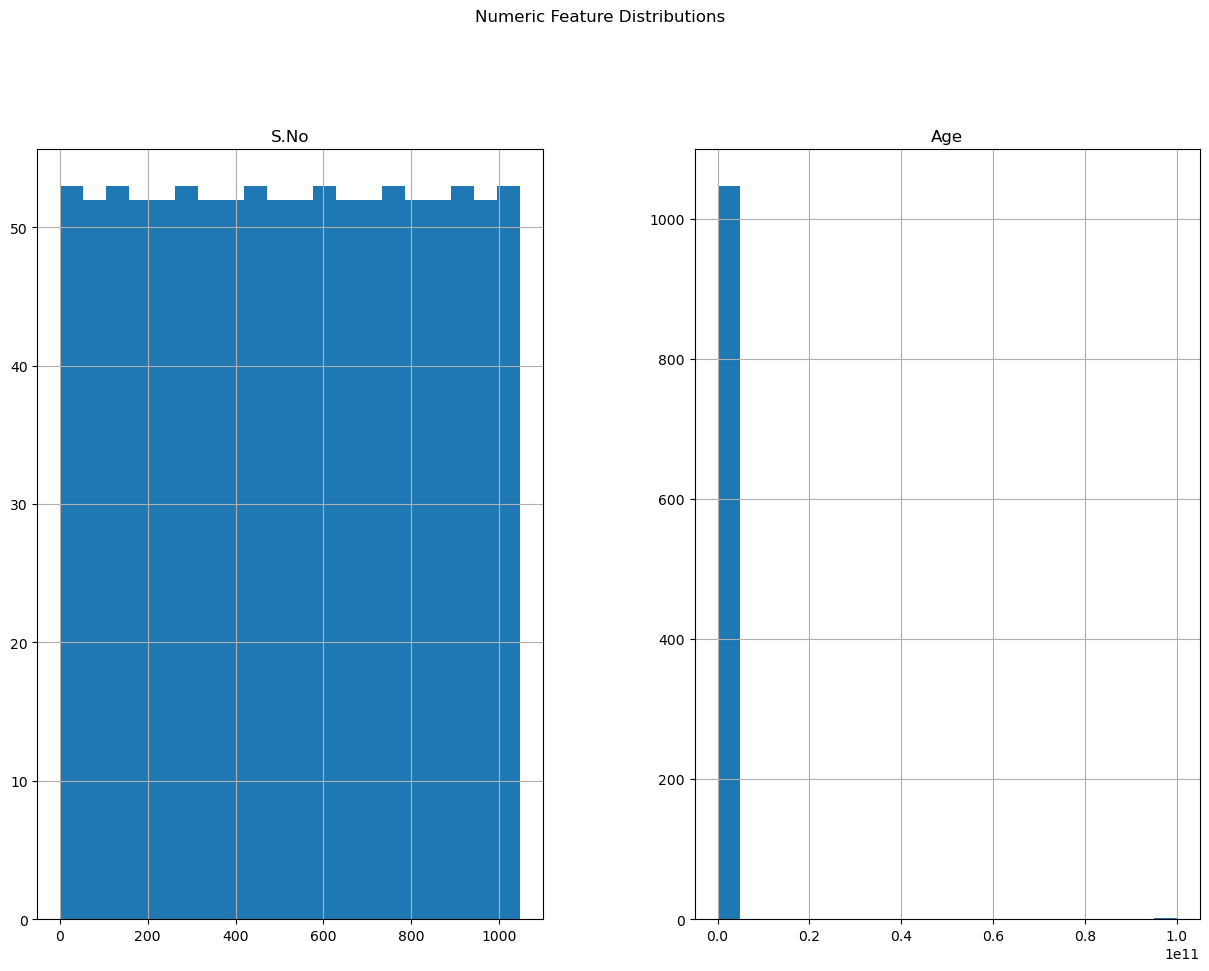

In [15]:
# Histograms
train[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()



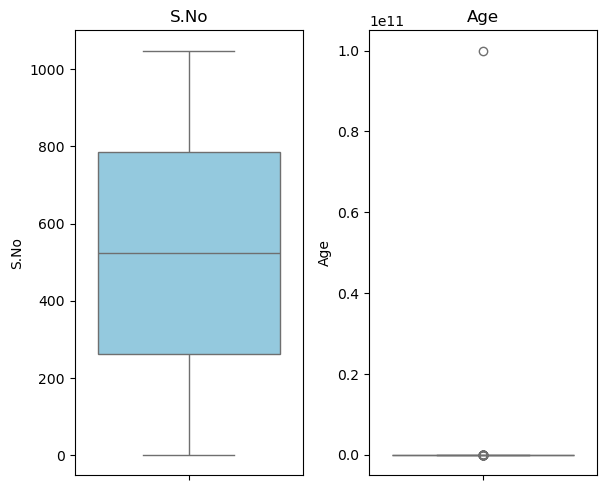

In [16]:
# Boxplots to check outliers
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols[:5], 1):  # show first 5 for readability
    plt.subplot(1,5,i)
    sns.boxplot(y=train[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

Unique counts + relationship with target.

In [17]:
# Step 3d: Categorical Features

cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != "treatment"]  # exclude target
print("Categorical columns:", cat_cols)

Categorical columns: ['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [18]:
# Unique value counts
for col in cat_cols:
    print(f"{col}: {train[col].nunique()} unique values")

Timestamp: 679 unique values
Gender: 45 unique values
Country: 42 unique values
state: 45 unique values
self_employed: 2 unique values
family_history: 2 unique values
work_interfere: 4 unique values
no_employees: 6 unique values
remote_work: 2 unique values
tech_company: 2 unique values
benefits: 3 unique values
care_options: 3 unique values
wellness_program: 3 unique values
seek_help: 3 unique values
anonymity: 3 unique values
leave: 5 unique values
mental_health_consequence: 3 unique values
phys_health_consequence: 3 unique values
coworkers: 3 unique values
supervisor: 3 unique values
mental_health_interview: 3 unique values
phys_health_interview: 3 unique values
mental_vs_physical: 3 unique values
obs_consequence: 2 unique values
comments: 128 unique values


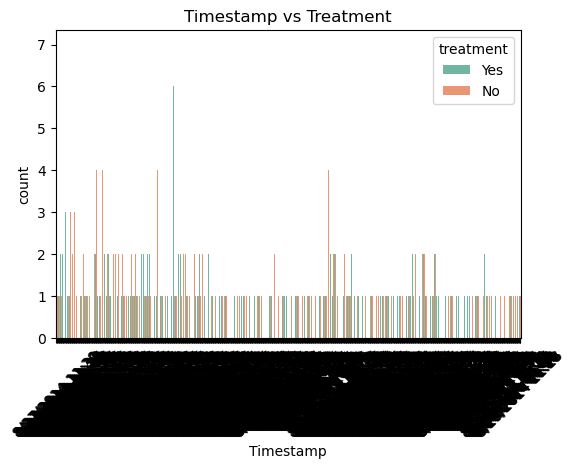

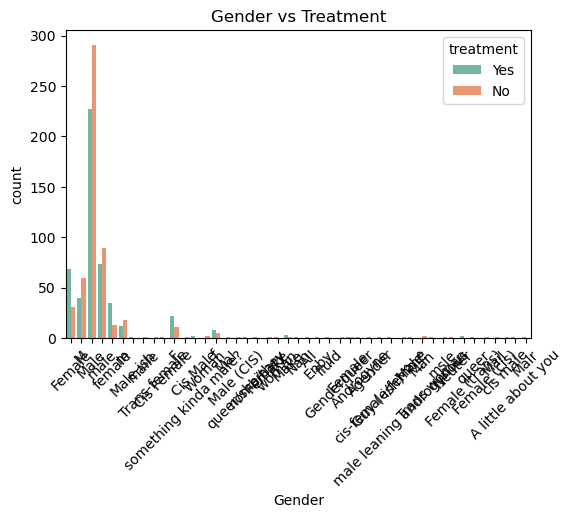

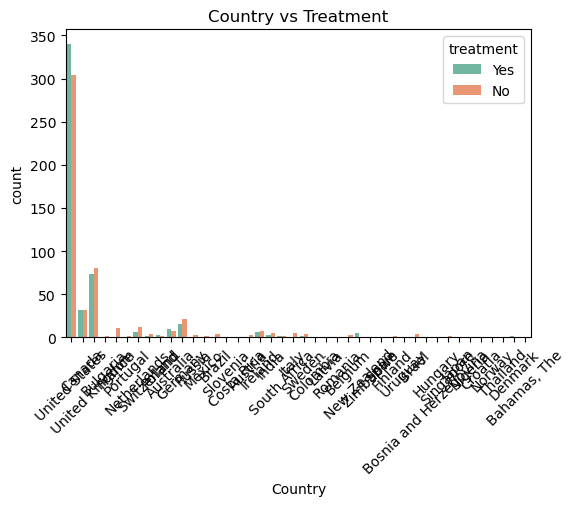

In [19]:
# Bar plots for first few categorical features vs target
for col in cat_cols[:3]:  # limit to first 3 for readability
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="treatment", data=train, palette="Set2")
    plt.title(f"{col} vs Treatment")
    plt.xticks(rotation=45)
    plt.show()

### Data Preprocessing

In [20]:
# 1. Drop ID/time columns (if present)
id_time_keywords = ("s.no", "sno", "serial", "id", "index", "timestamp", "time", "date")
drop_cols = [c for c in train.columns if any(k in c.lower() for k in id_time_keywords)]
print("Dropping columns:", drop_cols)

Dropping columns: ['S.No', 'Timestamp']


In [22]:
train = train.drop(columns=drop_cols, errors='ignore')
test  = test.drop(columns=[c for c in drop_cols if c in test.columns], errors='ignore')

In [23]:
# 2. Separate target
y = train["treatment"].map({"Yes":1, "No":0})
X = train.drop(columns=["treatment"])
X_test = test.copy()

In [25]:
# 3. Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Age']
Categorical columns: ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [26]:
# 4. Build pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # fill missing with median
    ("scaler", StandardScaler())                     # scale values
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fill missing with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    # encode categories
])


In [27]:
# 5. Combine with ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [29]:
# 6. Fit on train and transform both train/test
X_proc = preprocessor.fit_transform(X)
X_test_proc = preprocessor.transform(X_test)

print("Processed training shape:", X_proc.shape)
print("Processed test shape:", X_test_proc.shape)

Processed training shape: (1048, 322)
Processed test shape: (210, 322)


### Model Training

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [30]:
# 1. Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X_proc, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Validation shape:", X_val.shape)

Train shape: (838, 322) Validation shape: (210, 322)


In [36]:
# 2. Baseline Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [37]:
# 3. Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("ROC-AUC:", roc_auc_score(y_val, y_prob))
    print("Classification Report:\n", classification_report(y_val, y_pred))


🔹 Logistic Regression Performance:
Accuracy: 0.7523809523809524
F1 Score: 0.7450980392156863
ROC-AUC: 0.8080029035477725
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       107
           1       0.75      0.74      0.75       103

    accuracy                           0.75       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.75      0.75      0.75       210


🔹 Random Forest Performance:
Accuracy: 0.7238095238095238
F1 Score: 0.7070707070707071
ROC-AUC: 0.8088195263587696
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       107
           1       0.74      0.68      0.71       103

    accuracy                           0.72       210
   macro avg       0.72      0.72      0.72       210
weighted avg       0.72      0.72      0.72       210



### Model Tuning

In [38]:
# Step 6: Model Tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

log_reg_params = {
    "C": np.logspace(-3, 3, 10),   # Regularization strength
    "penalty": ["l1", "l2"]
}

log_reg_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=log_reg_params,
    n_iter=10,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1
)

log_reg_search.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_reg_search.best_params_)
print("Best Logistic Regression F1:", log_reg_search.best_score_)



Best Logistic Regression Params: {'penalty': 'l2', 'C': np.float64(2.154434690031882)}
Best Logistic Regression F1: 0.7343979610203449


In [39]:
# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("\nBest Random Forest Params:", rf_search.best_params_)
print("Best Random Forest F1:", rf_search.best_score_)


Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best Random Forest F1: 0.752348730137067


### Final Model Training + Test Predictions

In [40]:
 #Choose the best model (example: Random Forest from tuning)
best_model = rf_search.best_estimator_

# Retrain on the full training data
best_model.fit(X_proc, y)

# Predict on test set
test_preds = best_model.predict(X_test_proc)

# Map back to Yes/No labels if needed
test_preds_labels = pd.Series(test_preds).map({1: "Yes", 0: "No"})

In [ ]:
# Load sample submission to maintain format
sample_sub = pd.read_csv("/mnt/data/sample_submission__1_.csv-1756126132473")

# Insert predictions (make sure column name matches sample)
submission = sample_sub.copy()
submission["treatment"] = test_preds_labels.values

# Save submission file
submission.to_csv("final_submission.csv", index=False)

print("✅ Submission file created: final_submission.csv")
print(submission.head())